In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
df=sns.load_dataset("iris")

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
df["species"]=df["species"].apply(lambda x:0 if x=="setosa" else (1 if x=="versicolor" else 2))

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
depnedent_features=df.iloc[:,:-1]
indepnedent_features=df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [15]:
X_train,X_test,y_train,y_test=train_test_split(depnedent_features,indepnedent_features,test_size=0.3,random_state=42)

In [16]:
model=DecisionTreeClassifier()

In [17]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
import matplotlib.pyplot as plt

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[

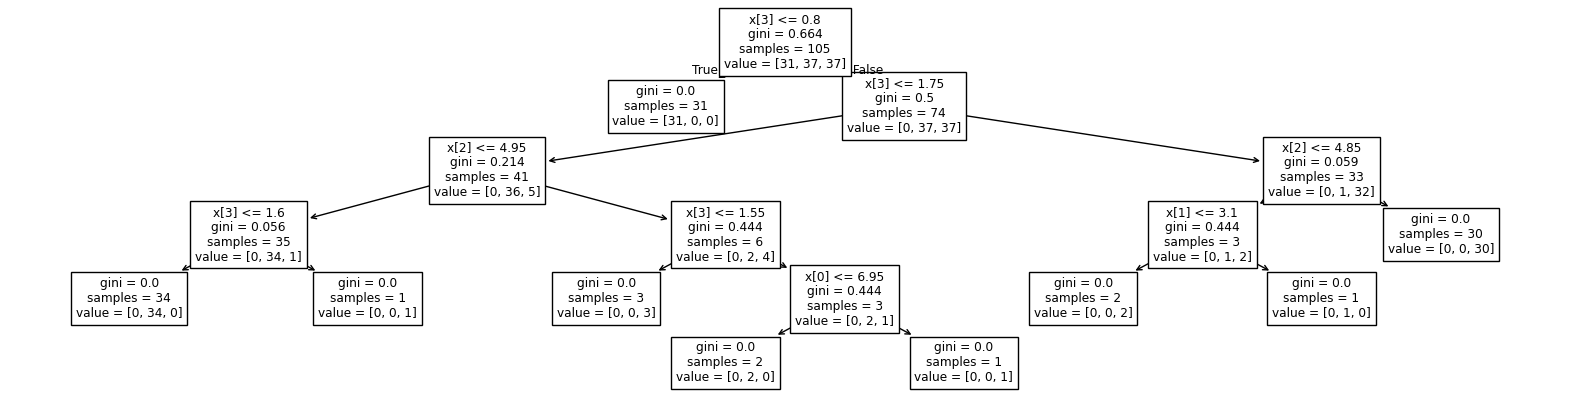

In [25]:
plt.figure(figsize=(20,5))
tree.plot_tree(model)

In [26]:
depnedent_features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
model_post_prunning=DecisionTreeClassifier(max_depth=2)

In [28]:
model_post_prunning.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

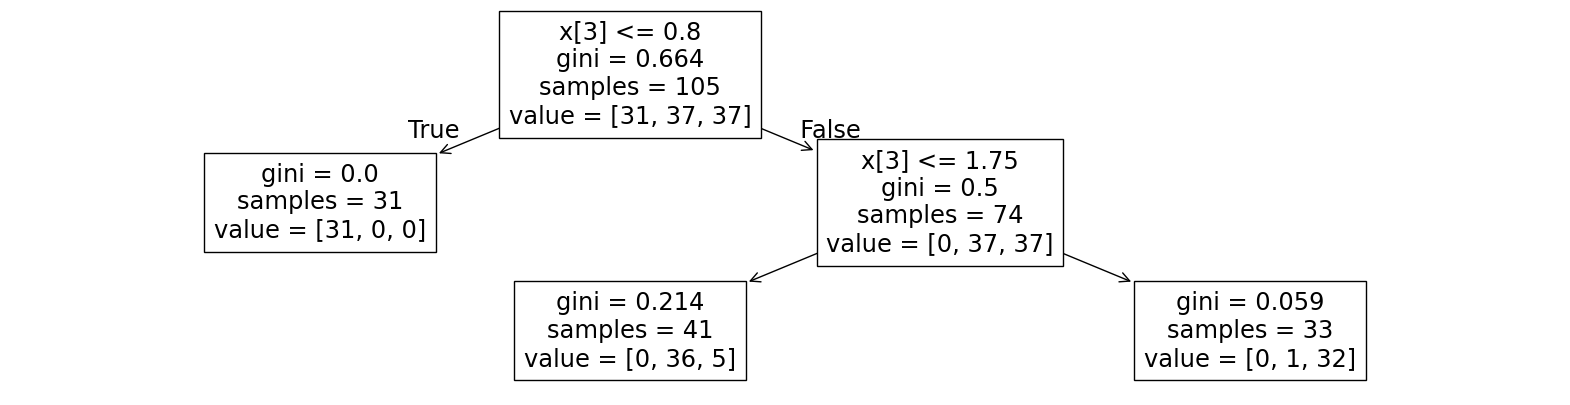

In [29]:
plt.figure(figsize=(20,5))
tree.plot_tree(model_post_prunning)

In [31]:
model_pred=model.predict(X_test)
Post_prunning_model_pred=model_post_prunning.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns

In [32]:
print(accuracy_score(model_pred,y_test))

1.0


In [33]:
print(accuracy_score(Post_prunning_model_pred,y_test))

1.0


# Hyper parameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV

In [45]:
model=DecisionTreeClassifier()
params={
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth":[1,2,3,4,5,6,7],
    "random_state":[1,2,3,5,6]  
}

In [46]:
cv=GridSearchCV(estimator=model,param_grid=params,cv=5,scoring="accuracy")

In [47]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'random_state': [1, 2, 3, 5, 6],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [48]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'random_state': 6, 'splitter': 'random'}

In [49]:
cv.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int64)